Importing Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt

###**Q1.KNN (k-nearest neighbour) classifier**###

**knn_acc :** This function takes the training dataset,testing dataset and k(number of neighbours) as its input.It takes a point from the training set and finds the k closest points in the training set.It then classifies the point based on the mode of the classification of the closest points(+1 or -1).It returns the accuracy of the KNN on the test set.

In [18]:
def knn_acc(dataset_train,dataset_test,k):
  correct_pred = 0 #for storing the number of correct predictions
  for point_i in dataset_test:#iterating through the test dataset.
    test_point = np.array((point_i[0],point_i[1]))#creating a numpy array with the coordinates of the point.
    closest_points = []#list to store the closest points.
    for point_j in dataset_train:#iterating through the training dataset.
      train_point = np.array((point_j[0],point_j[1]));#creating a numpy array with the coordinates of the point.
      dis = np.linalg.norm(test_point - train_point)#finding the distance of the point from the test point.
      closest_points.append((dis,point_j[2]))#appending the distance and the classification of the point.
    closest_points.sort()#sorting the list.
    pos_yk = 0#for counting the points with y = "+1"
    neg_yk = 0#for counting the points with y = "-1"
    for i in range(k):#iterating through the first k points in the list.
      if (closest_points[i][1] == 1):#if y = 1,increment pos_yk
          pos_yk += 1
      else: #else increment neg_yk
          neg_yk += 1

    #finding the max and storing the predicted value accordingly.
    if (pos_yk >= neg_yk):
        pred_val = 1
    else :
        pred_val = -1

    #if the predicted value is same as the classification of the point in test set,the prediction is correct.
    if (pred_val == point_i[2]):
      correct_pred += 1
  #finding the prediction accuracy by dividing correct predicitons with total points.
  pred_acc = correct_pred/2
  return pred_acc

**knn_plot :** This function takes the training set,testing set,the range in which knn should be performed and step(similar to i = start,i = end,i += step in a for loop).It finds the accuracy of each point and returns a plot of accuracy vs iteration number. 

In [19]:
def knn_plot(dataset_train,dataset_test,start,end,step):
  accuracy_list = []
  iteration_list = []
  for i in range(start,end,step):#iterating through the given range of k
    acc = knn_acc(dataset_train,dataset_test,i);#finding the acc with k = i.
    print("Accuracy with k = " + str(i) + " is " + str(acc) + "%")
    accuracy_list.append(acc);#appending acc to a list for plotting.
    iteration_list.append(i);#appending the iteration number to a list for plotting.
  plt.plot(iteration_list,accuracy_list)
  plt.title("Plot of Accuracy vs Iteration number")

Reading data from the dataset and storing in a numpy array.

In [20]:
X_train = np.loadtxt("knn-train.txt")
X_test = np.loadtxt("knn-test.txt")

Taking inputs for the start,end and step used in the "knn_plot" function.

In [21]:
start,end = map(int,input("Enter the range on which knn-algorithm should run : ").split())
step = int(input("Enter an integer for incrementing(if no specific step,enter 1) : "))

Enter the range on which knn-algorithm should run : 1 100
Enter an integer for incrementing(if no specific step,enter 1) : 5


Plotting the accuracy vs iteration number graph

Accuracy with k = 1 is 88.0%
Accuracy with k = 6 is 88.5%
Accuracy with k = 11 is 92.0%
Accuracy with k = 16 is 89.5%
Accuracy with k = 21 is 89.5%
Accuracy with k = 26 is 90.0%
Accuracy with k = 31 is 90.5%
Accuracy with k = 36 is 92.0%
Accuracy with k = 41 is 91.0%
Accuracy with k = 46 is 92.0%
Accuracy with k = 51 is 91.5%
Accuracy with k = 56 is 91.0%
Accuracy with k = 61 is 91.5%
Accuracy with k = 66 is 90.0%
Accuracy with k = 71 is 91.0%
Accuracy with k = 76 is 91.5%
Accuracy with k = 81 is 90.5%
Accuracy with k = 86 is 90.0%
Accuracy with k = 91 is 91.0%
Accuracy with k = 96 is 90.5%


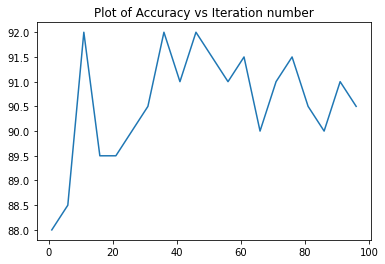

In [22]:
knn_plot(X_train,X_test,start,end,step)

###**Q2.Perceptron Classifier**###

**prcpt_train :** This function takes the training dataset and padding(if given) as its input.This function then finds a perceptron line that divides the dataset and returns the vector perpendicular to the direction of the line as a matrix.

In [ ]:
def prcpt_train(dataset_train,padding = 0):
  iterations = 0#for counting the number of iterations.
  dim = dataset_train.shape[1]-1#dimension of x(# of features)
  if (padding != 0):#if padding is not 0,increment dim.
    dim += 1
  w = np.random.uniform(-1,1,(1,dim));#initializing a random w with same shape as x.
  
  convergence = False
  while (convergence == False):#do the following until w converges and doesnot change. 
    convergence = True
    for point in dataset_train:#iterating through each point in training set.
      if (padding != 0):#if padding is not 0,add the padding to the point and store it in a temp list.
        temp = point[:(dim-1)]
        temp = np.append(temp,padding)
      else :#else store the point in a temp list.
        temp = point[:dim]
      
      x_k = np.array(temp)#converting the list to np array.
      y_k = point[dataset_train.shape[1]-1]#storing the classification of the point into y_k.
      if (np.dot(w,x_k) * y_k < 0):#(W_T*x_k)*y_k < 0 implies that the point is misclassifed.
        w += y_k * x_k;#so we add y_k*x_k to w to correct this.
        convergence = False #since a point is misclassified,we have to recalculate w for all points.
        iterations += 1#increment the iterations.
        break
        
  #printing the number of iterations.
  print("Number of Iterations taken for perceptron to converge : " + str(iterations))
  return w #returing the matrix

**prcpt_acc :** This function takes the testing data,the matrix obtained in the prev function and padding(if given) as its input and returns the accuracy of the perceptron classifier on the test set.

In [ ]:
def prcpt_acc(dataset_test,W,padding = 0):
  correct_pred = 0#for storing the number of correct predicitons.
  dim = dataset_test.shape[1]-1#dimension of x(# of features)
  if (padding != 0):#if padding is not 0,increment dim.
    dim += 1
    
  for point in dataset_test:#iterating through each point in test set.
      if (padding != 0):#if padding is not 0,add the padding to the point and store it in a temp list.
        temp = point[:(dim-1)]
        temp = np.append(temp,padding)
      else :#else store the point in a temp list.
        temp = point[:dim]

      x_k = np.array(temp)#converting the list to np array.
      y_k = point[dataset_test.shape[1]-1]#storing the classification of the point into y_k.
      if (np.dot(W,x_k)*y_k >= 0):#(W_T*x_k)*y_k >= 0 implies that the point is correctly classified.
        correct_pred += 1

  tot_points = dataset_test.shape[0]#finding the total points in the test set.
  acc = (correct_pred/tot_points)#acc is the correct predicitons divided by total points.

  #printing the accuracy of the classifier.
  print("Accuracy of the perceptron classifier on the given dataset is : " + str(acc*100) + "%")

**prcpt_plt :** This function takes the testing data,W,n(the length of the vector to be plotted) and padding(if given) and plots the following :

    1.Data points with class "+1" with green color.
    2.Data points with class "-1" with blue color
    3.The line w_t*x = 0 in black color
    4.The learnt perceptron direction in red color

In [ ]:
def prct_plt(dataset_test,W,n,padding = 0):
  green_points = []#list for storing points with class "+1"
  blue_points = []#list for storing points with class "-1"
  for point in dataset_test:#iterating through each point in the test set.
    y_k = point[dataset_test.shape[1]-1]#storing the class in y_k
    if (y_k == 1):#if class is 1,append to green_points list.
      green_points.append((point[0],point[1]))
    else : #else append to blue_points list.
      blue_points.append((point[0],point[1]))

  #finding thee min and max x and y coordinates in the test set.
  x_min = np.min(dataset_test[:,0])
  x_max = np.max(dataset_test[:,0])
  y_min = np.min(dataset_test[:,1])
  y_max = np.max(dataset_test[:,1])

  #Plotting the points according to their class.
  temp_green = np.array(green_points)#converting the list into a np array.
  temp_blue = np.array(blue_points)#converting the list into a np array.
  plt.scatter(temp_green[:,0],temp_green[:,1],label = "+1",c = "g")#plotting the green points.
  plt.scatter(temp_blue[:,0],temp_blue[:,1],label = "-1",c = "b")#plotting the blue points.

  #Plotting the perceptron line.
  line = np.linspace(x_min,x_max,100)#generating a set of evenly spaced x - coordinates.
  slope = -W[0][0]/W[0][1]#slope of the perceptron line.
  if (padding == 0):#if padding is 0,then c in (y = mx + c) is 0.
    c = 0
  else :#else, c is as follows.
    c = -W[0][2]/W[0][1]
  plt.plot(line,slope * line + c,c = "black",label = "perceptron line")#here y = (slope)*x + c.

  #Plotting the perceptron diection
  x = (y_min - c)/slope#finding the x-coordinate on the line with y = y_min.
  start = [x,y_min]#the start point of the vector to be plotted.
  plt.quiver(*start,n*W[0][0],n*W[0][1],color = "r",label = "perceptron direction",scale = 10)
  #quiver is used to plot vectors on a graph.We multiply by the x and y cordinates with given length for plotting a vector of given length.

  #Scaling the plot.
  plt.ylim(y_min-20,y_max+20)
  plt.xlim(x_min-5,x_max+5)
  
  plt.legend()
  plt.show()

**prcpt_R_gamma :** This function takes the testing dataset and W as its input and prints appropriate R and gamma for the dataset.

In [ ]:
def prcpt_R_gamma(dataset_test,W):
  R = 0#initialzing R
  gamma = np.inf#initilaizing gamma.
  temp = np.array((W[0][0],W[0][1]))
  
  for point in dataset_test:#iterating through each point in test set.
    x_k = np.array((point[0],point[1]))#storing the coordinates in a numpy array.
    y_k = point[2]#storing the class in y_k.
    dis = np.linalg.norm(x_k)#finding the distance of the point from origin.
    R = max(R,dis)#R is anything greater than distance of the farthest point.
    gamma = min(gamma,np.dot(temp,x_k)*y_k)#gamma is always less than or equal to min(w_t*x_k)*y_k

  #printing R and gamma.
  print("R is greater than or equal to : " + str(R))
  print("Gamma is less than or equal to : " + str(gamma))

Reading data from the datasets and storing them in numpy arrays.

In [3]:
X_train = np.loadtxt("perceptron-train.txt")
X_test = np.loadtxt("perceptron-test.txt")

Finding W using the prcpt_train function and printing it.

In [ ]:
W = prcpt_train(X_train)
print("W obtained after training(not normalized) : " + str(W))

Number of Iterations taken for perceptron to converge : 10975
W obtained after training(not normalized) : [[12766.95896945   -15.45394271]]


Finding the accuracy of the perceptron classifier and printing it using prcpt_acc function.

In [ ]:
prcpt_acc(X_test,W)

Accuracy of the perceptron classifier on the given dataset is : 100.0%


Normalizing W for plotting and finding R and gamma.

In [ ]:
W = W/np.linalg.norm(W)
print("Normalized W : " + str(W))

Normalized W : [[ 0.99999927 -0.00121046]]


Plotting the graph with the required things. 

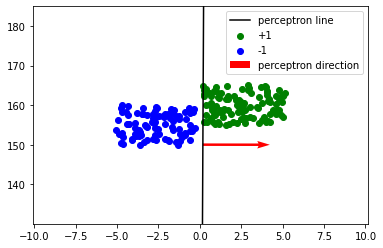

In [ ]:
prct_plt(X_test,W,2)

Printing R and gamma for the test set.

In [ ]:
prcpt_R_gamma(X_test,W)

R is greater than or equal to : 165.00377396208316
Gamma is less than or equal to : 0.015806690649746106


###**Q3.Biased Perceptron Classifier**###

This classifier is similar to the above classifier,but each xi is appended with 1 and w is (w(1),w(2),w(3)).

Reading data from the datasets and storing them in numpy arrays.

In [ ]:
X_train = np.loadtxt("perceptron-biased-train.txt")
X_test = np.loadtxt("perceptron-biased-test.txt")

Taking input for padding(given 1 in the question).

In [ ]:
padding = int(input("Enter an integer to pad the dataset(If not required,enter 0) : "))

Enter an integer to pad the dataset(If not required,enter 0) : 1


Finding W on the padded data and printing it.

In [ ]:
W = prcpt_train(X_train,padding)
print("W obtained after training(not normalized) : " + str(W))

Number of Iterations taken for perceptron to converge : 4658924
W obtained after training(not normalized) : [[   6844.45765896    -557.54880169 -189295.05834401]]


Finding the accuracy of the biased classifier on the padded data.

In [ ]:
prcpt_acc(X_test,W,padding)

Accuracy of the perceptron classifier on the given dataset is : 100.0%


Normalizing W for plotting and finding R and gamma

In [ ]:
W = W/np.linalg.norm(W)
print("Normalized W : " + str(W))

Normalized W : [[ 0.03613384 -0.00294346 -0.99934262]]


Plotting the graph(with unpadded data) for the biased classifier with the required things.

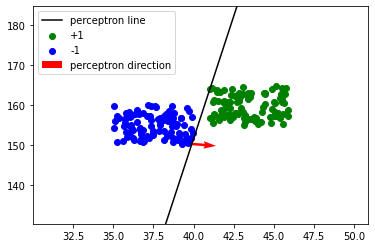

In [ ]:
prct_plt(X_test,W,20,padding)

Printing R and gamma for the test set.

In [ ]:
prcpt_R_gamma(X_test,W)

R is greater than or equal to : 170.73723324565267
Gamma is less than or equal to : -0.9940975316656181
